In [ ]:
import pandas as pd
df=pd.read_table("/content/SMSSpamCollection",sep="\t",header=None,names=["label","sms_message"])
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.label.unique()

array(['ham', 'spam'], dtype=object)

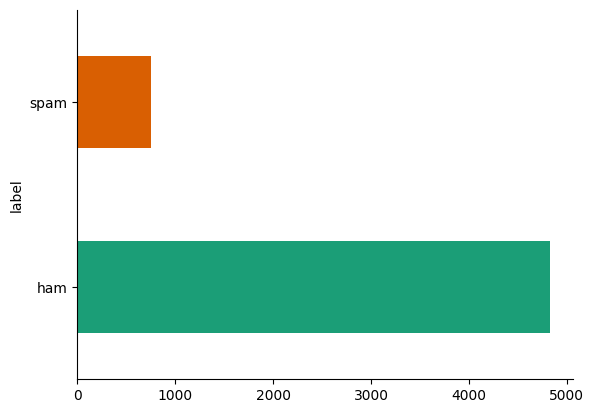

In [ ]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#map df["label"] ham to 0 and spam to 1

df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head(5)

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# build  a model to predict label as 0 or 1 based on sms_message and find it's accuracy percentage

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], df['label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 99.19%


In [ ]:
#  giving some testing data to model and show output and find accurcay

test_data = ["FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! Subscribe6GBP/mnth inc 3hrs 16 stop?txtStop",
             "Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex and if you fancy a chat give me a call on 09099726483. I'm really looking forward to hearing from you xx",
             "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]

test_data_transformed = vectorizer.transform(test_data)

predictions = model.predict(test_data_transformed)

for i, prediction in enumerate(predictions):
    if prediction == 0:
        print(f"Message {i + 1}: Not Spam")
    else:
        print(f"Message {i + 1}: Spam")

accuracy = metrics.accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")


Message 1: Spam
Message 2: Not Spam
Message 3: Not Spam
Accuracy: 99.19%


In [ ]:
#df["label"]=df.label.map({"ham":0,"spam":1})
#df.head()